In [ ]:
ls -lh /content/sample_data

total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json*
-rw-r--r-- 1 root root 295K Feb 14 14:28 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Feb 14 14:28 california_housing_train.csv
-rw-r--r-- 1 root root  18M Feb 14 14:28 mnist_test.csv
-rw-r--r-- 1 root root  35M Feb 14 14:28 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md*


In [ ]:
cat /content/sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


In [ ]:
import pandas as pd

quartet = pd.read_json('/content/sample_data/anscombe.json')

In [ ]:
quartet.sample(5)

,Series,X,Y
2,I,13,7.58
18,II,4,3.10
22,III,10,7.46
12,II,8,8.14
7,I,4,4.26


In [ ]:
data = quartet[quartet.Series=='I'].set_index('X').sort_index()[['Y']]
data

,Y
X,
4,4.26
5,5.68
6,7.24
7,4.81
8,6.95
9,8.81
10,8.04
11,8.33
12,10.84


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 4 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes
None


<Axes: xlabel='X'>

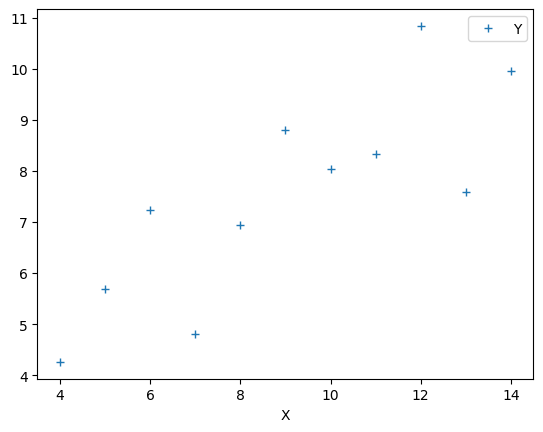

In [ ]:
print(data.info())
data.plot(style='+')

## Регрессия
Регре́ссия (лат. regressio — обратное движение, отход) в теории вероятностей и математической статистике — односторонняя стохастическая зависимость, устанавливающая соответствие между случайными переменными, то есть математическое выражение, отражающее связь между зависимой переменной $у$ и независимыми переменными $х$ при условии, что это выражение будет иметь статистическую значимость.

In [ ]:
def foo(x):
  return np.sqrt(x)

foo(5)

2.23606797749979

array([ 4.        ,  4.20408163,  4.40816327,  4.6122449 ,  4.81632653,
        5.02040816,  5.2244898 ,  5.42857143,  5.63265306,  5.83673469,
        6.04081633,  6.24489796,  6.44897959,  6.65306122,  6.85714286,
        7.06122449,  7.26530612,  7.46938776,  7.67346939,  7.87755102,
        8.08163265,  8.28571429,  8.48979592,  8.69387755,  8.89795918,
        9.10204082,  9.30612245,  9.51020408,  9.71428571,  9.91836735,
       10.12244898, 10.32653061, 10.53061224, 10.73469388, 10.93877551,
       11.14285714, 11.34693878, 11.55102041, 11.75510204, 11.95918367,
       12.16326531, 12.36734694, 12.57142857, 12.7755102 , 12.97959184,
       13.18367347, 13.3877551 , 13.59183673, 13.79591837, 14.        ])

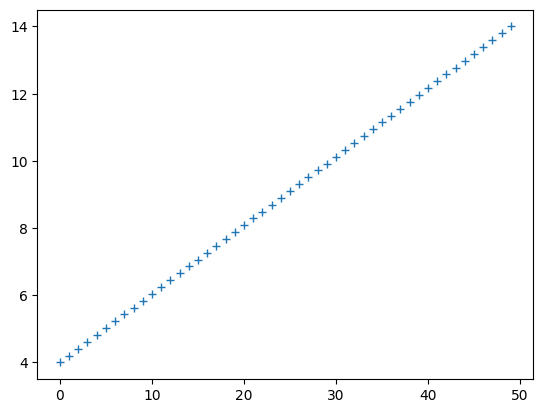

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(4, 14)  # n = 50 by default
plt.plot(xx, '+')
xx

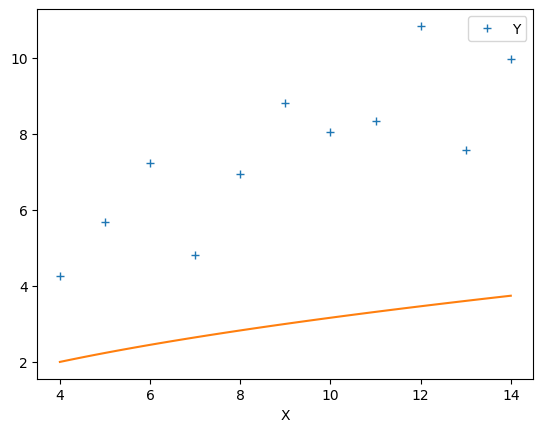

In [ ]:
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

## Интерполяция
В каком-то смысле задача похожая - провести линию/поверхность через точки. Заполнить пространство между ними какими-то промежуточными значениями.

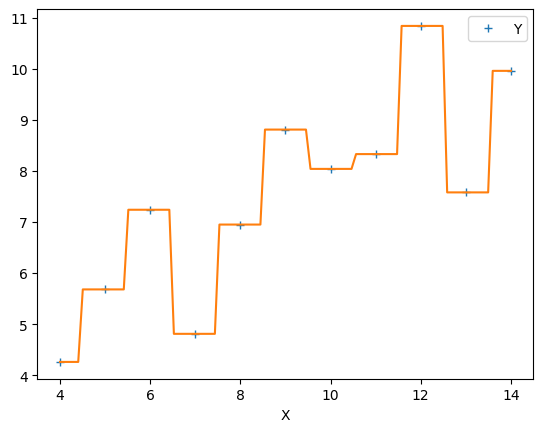

In [ ]:
from scipy import interpolate

interp = interpolate.interp1d(data.index, data.Y, kind='nearest')

data.plot(style='+')
xx = np.linspace(data.index.min(), data.index.max(), 100)
plt.plot(xx, interp(xx))
plt.show()

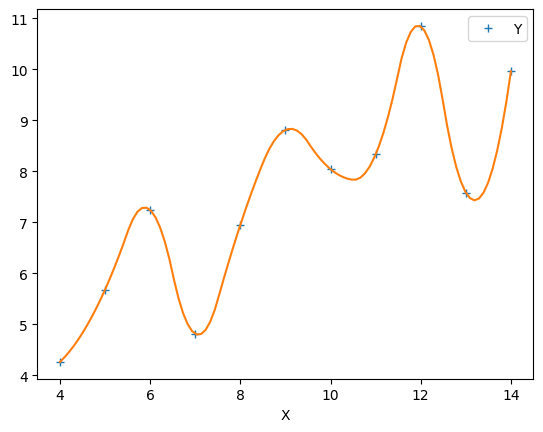

In [ ]:
data.plot(style='+')
plt.plot(xx, interpolate.interp1d(data.index, data.Y, kind='quadratic')(xx))
plt.show()

# Регрессии

## Линейная (метод наименьших квадратов)

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть

$$ y_{pred_i} = b_{0_{pred}} + b_{1_{pred}}X_i $$

где

* $y_{pred_i}$ --- зависимая переменная (цель)
* $X_i$ --- $i$-тое значение предиктора (вектора признаков)
* $b_{0_{pred}}$ --- пересечение (константа)
* $b_{1_{pred}}$ --- наклон для X


$$
\begin{aligned}
L(y_{pred}, Y) &=  \frac{1}{n}\sum_{i=1}^{n}\left(y_{pred} - Y\right)^2
\end{aligned}
$$

![](https://habrastorage.org/r/w1560/webt/vh/dt/b1/vhdtb1elxvvw8coyhhharuklwtw.png)

**Функция потерь** --- это мера количества ошибок, которые наша линейная регрессия делает на наборе данных:

$$ RSS = \sum_{i=1}^{n} (y_i - y_{pred_i})^2 = \sum_{i=1}^{n} (y_i - b_{0_{pred}} - b_{1_{pred}}X_i)^2 $$

**Среднеквадратичное отклонение ($MSE$)**:
$$ MSE = {1 \over n} \sum_{i=1}^{n} (y_i - y_{pred_i})^2 $$
* $b_{0_{pred}}, b_{1_{pred}}$ - значения, которые минимизирует RSS

$$ b_{1_{pred}} = {\sum_{i=1}^{n}(y_i - \bar y)(X_i - \bar X) \over \sum_{i=1}^{n}(X_i - \bar X)^2 } $$

$$ b_{0_{pred}} = \bar y - b_{1_{pred}}X $$

### Множественная линейная регрессия

$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где   
$у$ --- целевая переменная (что мы хотим предсказать),   
$x_i$ --- признак объекта $х$,   
$w_i$ --- вес $i$-го признака,   
$b$ --- bias (смещение, свободный член)

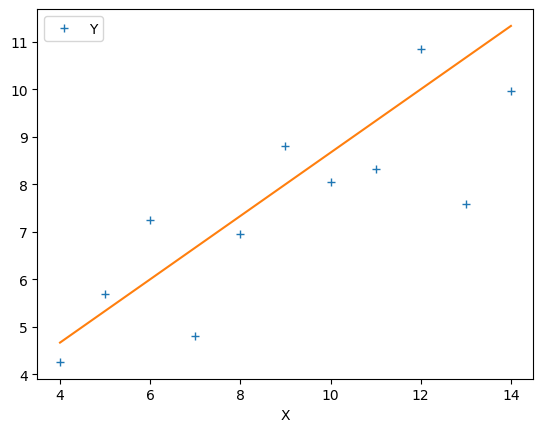

In [ ]:
foo = lambda x: 2 * x/3 + 2
data.plot(style='+')
plt.plot(xx, foo(xx))
plt.show()

In [ ]:
X = data.index.values.reshape(-1, 1)
xx = np.linspace(data.index.min(), data.index.max(), 100).reshape(-1, 1)
print(X.shape, xx.shape)

(11, 1) (100, 1)


Вес признаков:  [0.50027273] Член смещения:  2.9975454545454534


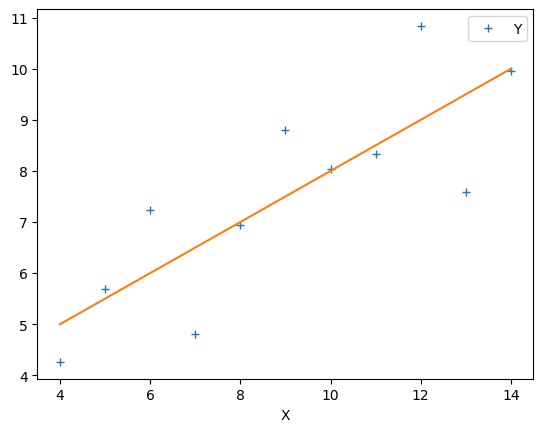

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X, data.Y)

print('Вес признаков: ', linear.coef_, 'Член смещения: ', linear.intercept_)

a = linear.coef_[0]
b = linear.intercept_

data.plot(style='+')
plt.plot(xx, a * xx + b)
plt.show()

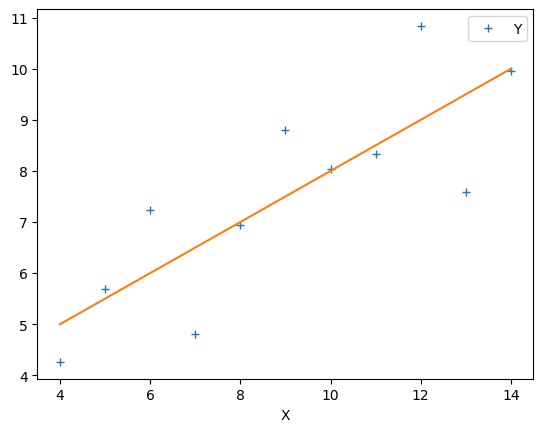

In [ ]:
data.plot(style='+')
plt.plot(xx, linear.predict(xx))
plt.show()

## Полиномиальная

Вместо прямых линий подбираем параболы, гиперболы и т.д.

Конкретно в sklearn для этого применяют не отдельную модель, а препроцессор который добавляет степени x к набору входных параметров.

In [ ]:
X

array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]])

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) генерирует новую матрицу признаков, состоящую из всех полиномиальных комбинаций признаков со степенью, меньшей или равной указанной степени. Например, если входная выборка двумерна и имеет вид $[a, b]$, полиномиальными признаками степени 2 являются $[1, a, b, a ^ 2, ab, b ^ 2]$.

array([[  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.]])

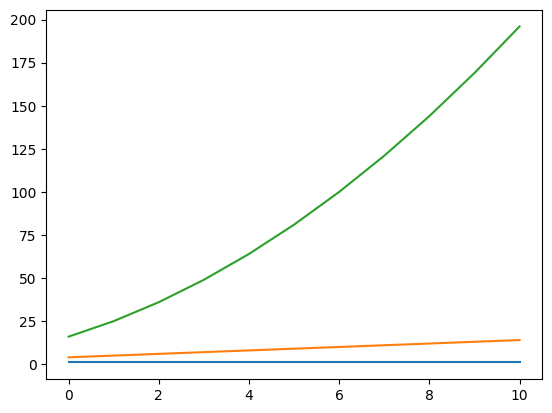

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x2 = poly.fit_transform(X)
plt.plot(x2)
x2

In [ ]:
model2 = LinearRegression().fit(x2, data.Y)
model2.coef_

array([ 0.        ,  1.06817483, -0.03155012])

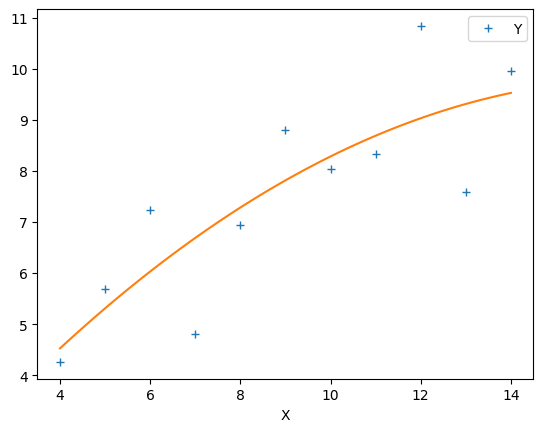

In [ ]:
data.plot(style='+')
xx2 = poly.transform(xx.reshape(-1, 1))
plt.plot(xx, model2.predict(xx2))
plt.show()

В `Pipeline` хранятся все этапы рабочего процесса в виде единого объекта

array([-1.17251770e-01, -1.76300017e+00, -6.98632915e+00, -1.45554257e+01,
       -1.09555807e+01,  1.42331001e+01, -5.67103436e+00,  1.20921332e+00,
       -1.56721315e-01,  1.27692591e-02, -6.41036111e-04,  1.81588263e-05,
       -2.22447121e-07])

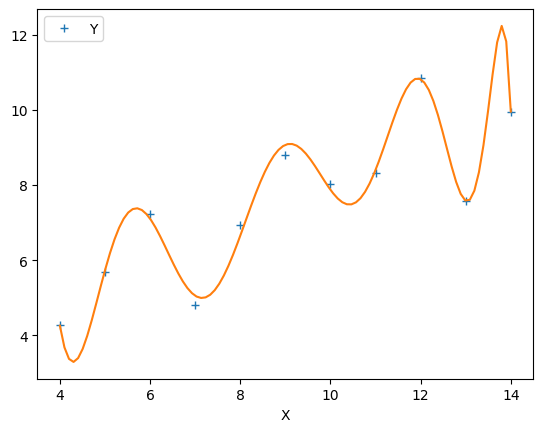

In [ ]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=12)),
                  ('linear', LinearRegression())])

model.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
model['linear'].coef_

Видим возможное переобучение, но компьютер не умеет смотреть на графики. Как формализовать этот вопрос?

## Валидация

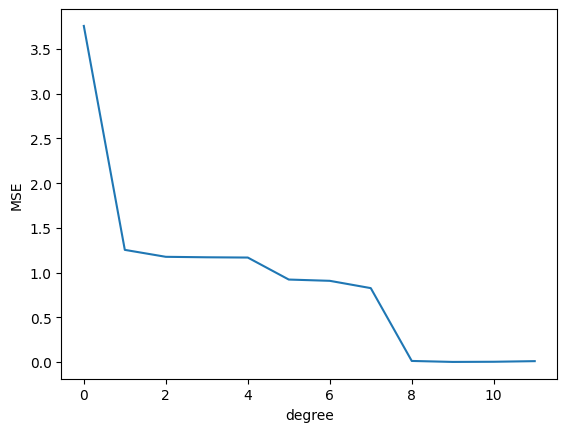

In [ ]:
from sklearn.metrics import mean_squared_error

score=[]
X_ = data.index.values.reshape(-1, 1)

for n in range(12):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression())])
  model.fit(X_, data['Y'])
  score.append(mean_squared_error(data['Y'], model.predict(X_)))

plt.plot(score)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xtest, Ytr, Ytest = train_test_split(data.index.values.reshape(-1, 1), data['Y'], random_state=11)
print([d.shape for d in (Xtr, Xtest, Ytr, Ytest)])

[(8, 1), (3, 1), (8,), (3,)]


In [ ]:
train_score=[]
test_score=[]

for n in range(5):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression())])
  model.fit(Xtr, Ytr)
  train_score.append(mean_squared_error(Ytr, model.predict(Xtr)))
  test_score.append(mean_squared_error(Ytest, model.predict(Xtest)))

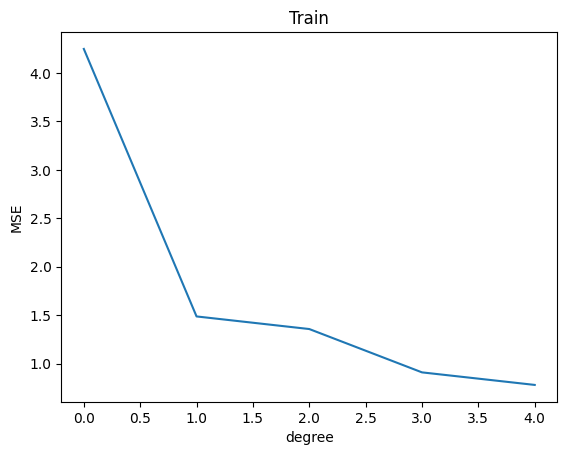

In [ ]:
score = pd.DataFrame({'train': train_score, 'test': test_score})
score.train.plot()
plt.title('Train')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

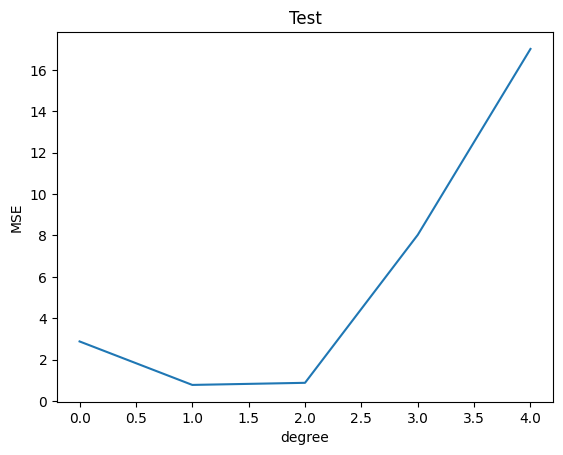

In [ ]:
score.test.plot()
plt.title('Test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

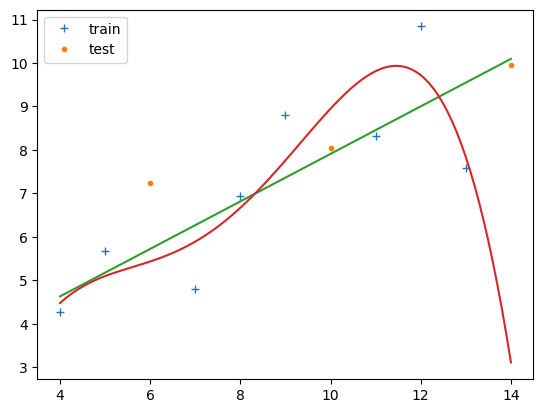

In [ ]:
plt.plot(Xtr, Ytr, '+', label='train')
plt.plot(Xtest, Ytest, '.', label='test')

plt.plot(xx,
         Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression())]).fit(Xtr, Ytr).predict(xx))

plt.plot(xx,
         Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression())]).fit(Xtr, Ytr).predict(xx))
plt.legend()
plt.show()

## Кроссвалидация

или перекрёстная проверка — метод оценки аналитической модели и её поведения на данных. При оценке модели имеющиеся в наличии данные разбиваются на k частей. Затем на k−1 частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования.

<img src='https://drive.google.com/uc?id=19TOWCsLwIjNSmcHzu46f6JqY5TEefm9h' width=600/>



In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(32, test_size=2)
cv

ShuffleSplit(n_splits=32, random_state=None, test_size=2, train_size=None)

In [ ]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
from sklearn.model_selection import cross_val_score

score = pd.DataFrame(columns=['mean', 'std'])

for n in range(14):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', LinearRegression())])
  sc = cross_val_score(model, X, data.Y, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

score

,mean,std
0,4.651814e+00,3.727819e+00
1,1.895753e+00,1.435676e+00
2,1.810196e+00,1.621967e+00
3,4.124295e+00,4.604217e+00
4,7.068615e+00,8.943277e+00
5,8.851435e+01,2.605452e+02
6,1.061840e+03,4.819302e+03
7,9.463447e+02,1.412709e+03
8,6.439918e+02,2.255152e+03
9,1.357532e+03,3.361052e+03


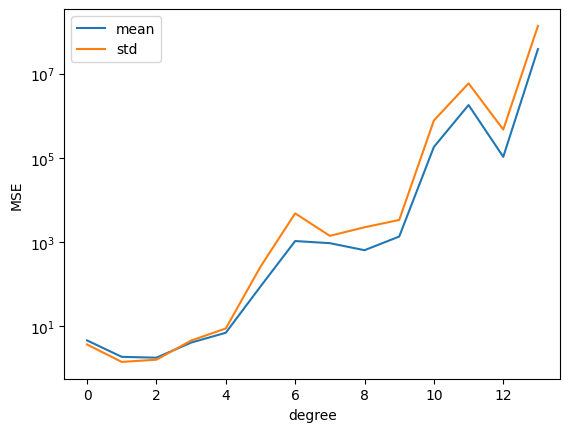

In [ ]:
score.plot(logy=True)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

1.8101961434270457

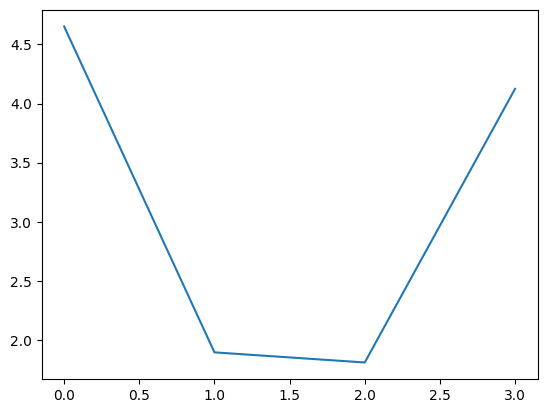

In [ ]:
score[:4]['mean'].plot()
score['mean'].min()

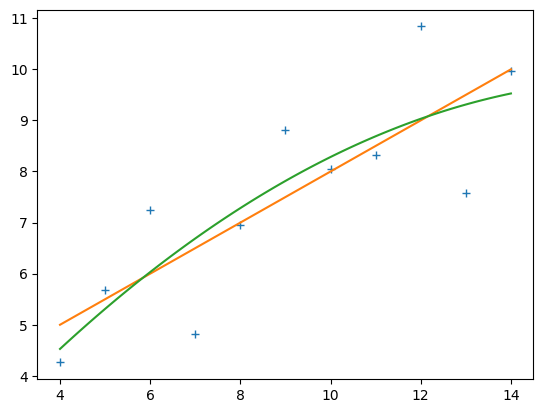

In [ ]:
plt.plot(X, data.Y, '+')

plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression())]).fit(X, data.Y).predict(xx))

plt.plot(xx, Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression())]).fit(X, data.Y).predict(xx))

plt.show()

## Модели с регуляризацией

Суть регуляризации состоит в том, чтобы добавлять к функции потерь слагаемое, ограничивающее рост весов модели (т. н. штраф).   
Например, обычная версия MSE линейной регрессии выглядит так:

$$ \frac {\sum_{i=1}^{n} (y_i - y_{pred_i})^2} {n} \rightarrow \min$$

Регуляризованная версия (добавляется $\alpha$ - штраф):

$$ \frac {\sum_{i=1}^{n} (y_i - y_{pred_i})^2} {n} + \alpha \rightarrow \min$$

* В **LASSO** (L1-регуляризация) мы штрафуем модель  **на сумму модулей всех ее весов** (на L1-норму весов):

$$ \frac {\sum_{i=1}^{n} (y_i - y_{pred_i})^2} {n} + \lambda\sum_{i=1}^{n}|w_i|\rightarrow \min $$

> L1 регуляризация склонна к отбору признаков, так как она может уменьшить веса признаков до нуля. Это позволяет убрать неинформативные признаки из модели, что может уменьшить сложность модели и улучшить ее обобщающую способность.

* **L2-регуляризация** (Ridge-регуляризация):

$$ \frac {\sum_{i=1}^{n} (y_i - y_{pred_i})^2} {n} + \lambda\sum_{i=1}^{n}w_i^2\rightarrow \min $$

> Эта штрафная функция является суммой квадратов весов модели, умноженных на гиперпараметр регуляризации. Это означает, что L2 регуляризация штрафует большие значения весов, заставляя их приближаться к нулю, но в отличие от L1 регуляризации не зануляет их полностью. Вместо этого L2 регуляризация штрафует большие значения весов более гладко и непрерывно, что позволяет более уверенно управлять компромиссом между точностью и сложностью модели. Кроме того, L2 регуляризация может помочь в предотвращении переобучения и улучшении обобщающей способности модели, а также в уменьшении влияния шума в данных на модель.

* **ElasticNet** использует как L1-, так и L2-регуляризации:

$$ \frac {\sum_{i=1}^{n} (y_i - y_{pred_i})^2} {n} + \lambda_1\sum_{i=1}^{n}|w_i| + \lambda_2\sum_{i=1}^{n}w_i^2\rightarrow \min $$


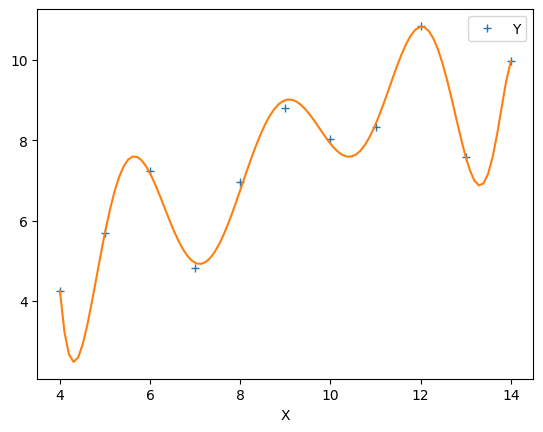

In [ ]:
model_poly11 = Pipeline([('poly', PolynomialFeatures(degree=11)),
                         ('linear', LinearRegression())])
model_poly11.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model_poly11.predict(xx))
plt.show()

In [ ]:
model_poly11['linear'].coef_

array([ 4.36456801e-01, -4.85588768e+01, -1.36544780e+02, -1.25452700e+02,
        1.33630565e+02, -4.95231236e+01,  1.01011697e+01, -1.26812131e+00,
        1.00765864e-01, -4.95322376e-03,  1.37728028e-04, -1.65866219e-06])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.248e+00, tolerance: 4.133e-03
  model = cd_fast.enet_coordinate_descent(


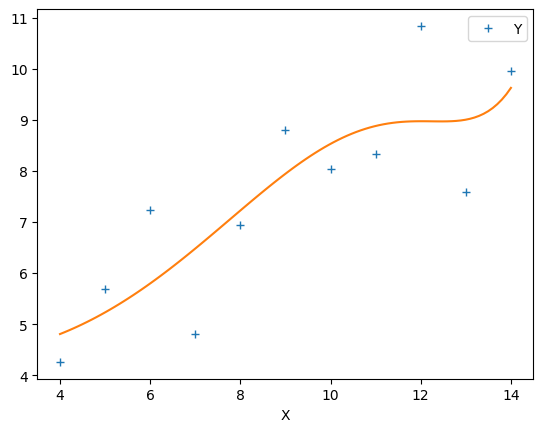

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

model = Pipeline([('poly', PolynomialFeatures(degree=11)),
                  ('linear', ElasticNet())])
model.fit(X, data.Y)
data.plot(style='+')
plt.plot(xx, model.predict(xx))
plt.show()


In [ ]:
model['linear'].coef_

array([ 0.00000000e+00,  0.00000000e+00,  4.00484580e-03,  7.96270195e-03,
       -1.44903923e-04, -1.42431772e-05, -9.13327699e-07, -4.73022216e-08,
       -1.59430388e-09,  2.77004902e-11,  1.19630669e-11,  1.50983788e-12])

In [ ]:
score = pd.DataFrame(columns=['mean', 'std'])
cv = ShuffleSplit(32, test_size=2)

for n in range(10):
  model = Pipeline([('poly', PolynomialFeatures(degree=n)),
                    ('linear', ElasticNet())])
  sc = cross_val_score(model, X, data.Y, cv=cv, scoring='neg_mean_squared_error')
  score.loc[n] = [-sc.mean(), sc.std()]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e+00, tolerance: 3.754e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+00, tolerance: 2.870e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.188e+00, tolerance: 4.014e

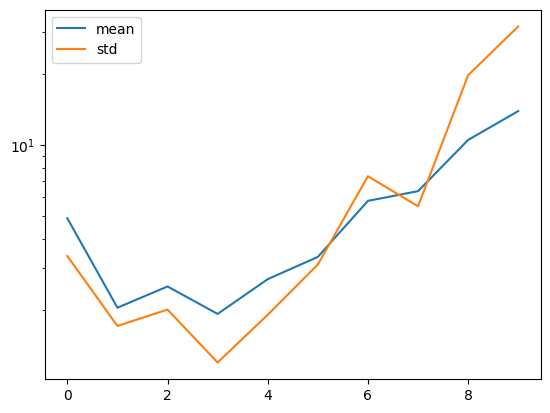

In [ ]:
score.plot(logy=True)
plt.show()

1.9219090560740129

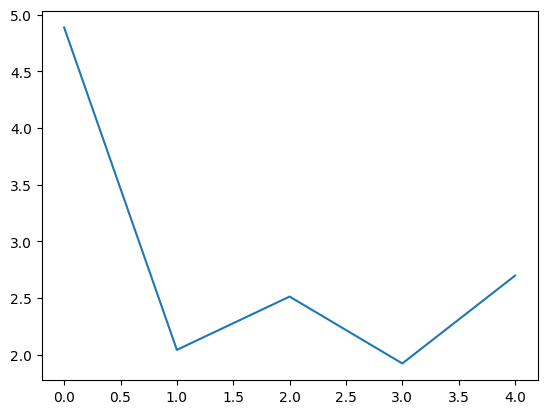

In [ ]:
score[0:5]['mean'].plot()
score['mean'].min()

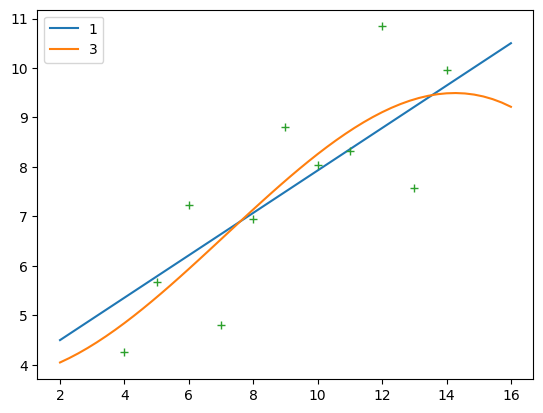

In [ ]:
x_ = np.linspace(2, 16).reshape(-1, 1)

pd.DataFrame(
  {n: Pipeline([('poly', PolynomialFeatures(degree=n)),
                 ('linear', ElasticNet())]).fit(X, data.Y).predict(x_)
                 for n in (1, 3)},
  index = x_[:,0]
).plot()
plt.plot(X, data.Y, '+')
plt.show()

## Логистическая

Линейная регрессия предсказывает непрерывную зависимую переменную с использованием заданного набора независимых переменных. Непрерывная переменная может иметь диапазон значений, например цену или возраст. Таким образом, линейная регрессия может предсказать фактические значения зависимой переменной. Она может ответить на такие вопросы, как «Какой будет цена на рис через 10 лет?»

В отличие от линейной регрессии, **логистическая регрессия** – это *алгоритм классификации*. Она не может предсказать фактические значения для непрерывных данных, однако может ответить на такие вопросы, как «Вырастет ли цена на рис на 50 % за 10 лет?».

Вместо предсказания бинарной переменной мы предсказываем непрерывную переменную со значениями на отрезке [0,1] при любых значениях независимых переменных.

<img src='https://i.imgur.com/mpXIRBU.png' width=600/>

Это достигается применением следующего регрессионного уравнения (логит-преобразование):

$$ \displaystyle\sigma(x) = \frac{1}{1 + e^{-x}} $$

<br>

Задача теперь формулируется так:

* **Предсказания:** $$
y_{pred}(x, w) = \frac{1}{1 + e^{-\langle x, w \rangle}}
$$

* **Функция потерь (LogLoss):** $$
L(y_{pred}, y) = -y\, log\,y_{pred} - (1-y)\,log\,(1-y_{pred})
$$

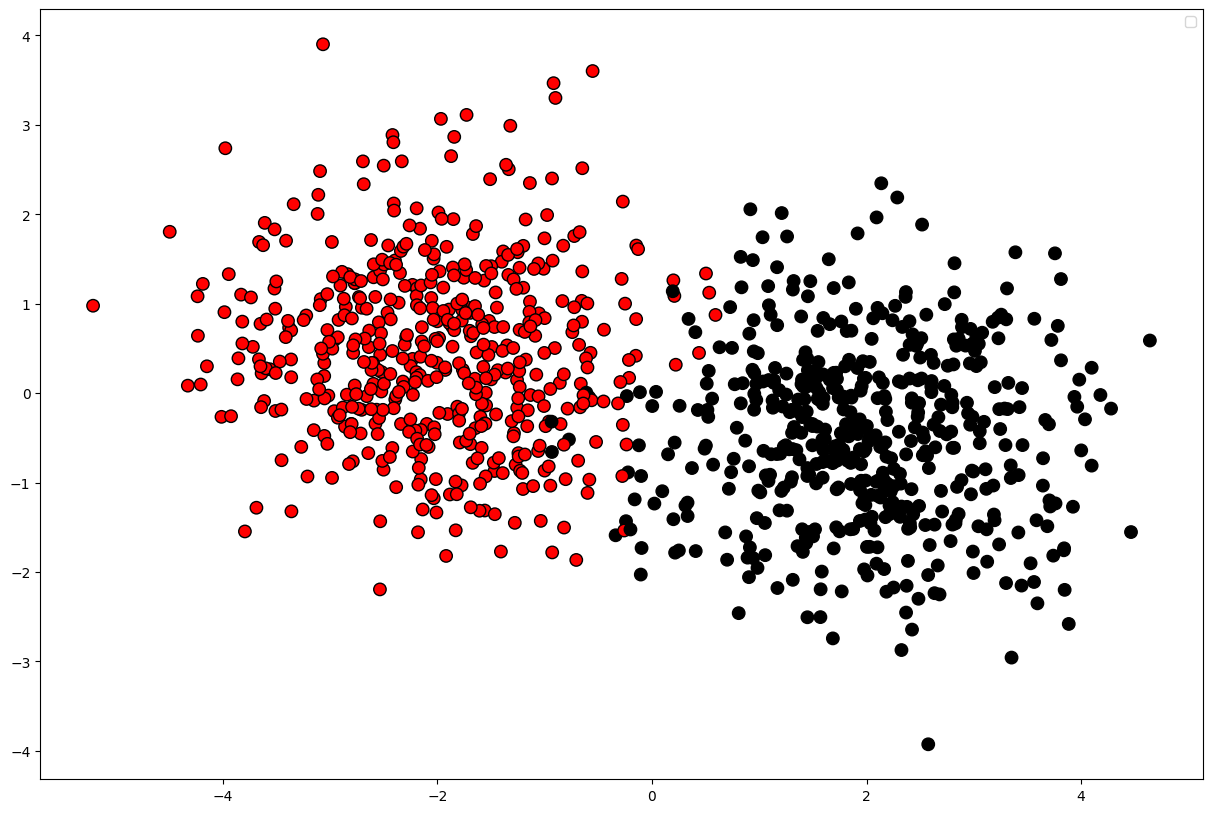

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=13)

colors = ("red", "k")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='k', s=80)
plt.legend()
plt.show()

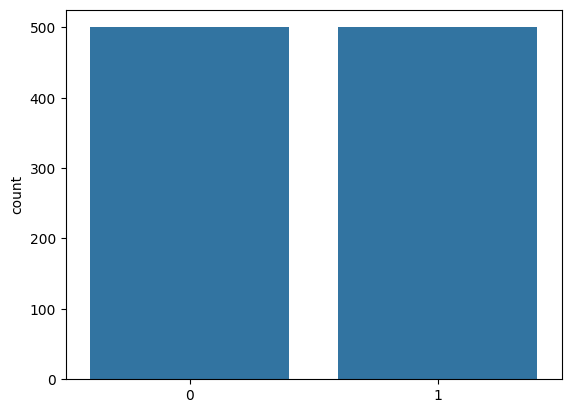

In [ ]:
import seaborn as sns

sns.countplot(x=y)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

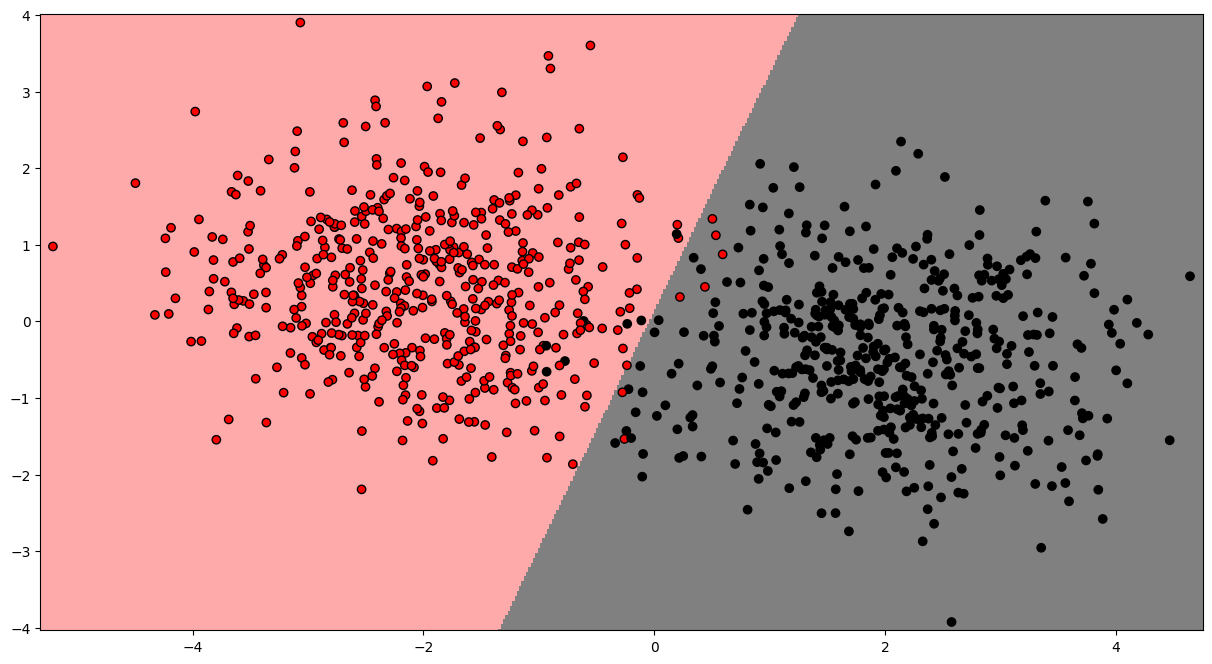

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', 'grey'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=colored_y, edgecolors='k')
plt.show()

# Задание

1. Попытаться применить линейную регрессию к какой-либо паре зависимой и независимой переменных в собственном наборе данных (или ирисах). Нарисовать график зависимости $y$ от $x$ с линией. Кроссвалидацией оценить ошибку (любая метрика ошибки на ваш выбор).
2. Теперь при той же зависимой переменной $y$ взять в качестве независимых переменных все (числовые) переменные набора данных. График нарисовать уже не получится, но кроссвалидацией всё равно можно оценить ошибку с той же выборкой. **Стала ли ошибка меньше за счет того, что у модели появилось больше информации?**
3. Применить логистическую регрессию для классификации цветков ириса. Визуализировать границы решения по аналогии с примером `make_blobs`.



